<a href="https://colab.research.google.com/github/julian-masdatascience/ML/blob/master/ML_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML - No Supervisado

Las librerias más utilizadas son scikit-learn, TensorFlow y keras

### Lets Go!!

In [2]:
## Se importan las librerias
from sklearn import datasets 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
## cargamos un dataset de la libreria sklearn
ds = datasets.load_iris()
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Ahora visualicemos datos y miremos como se agrupan


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
74                6.4               2.9                4.3               1.3


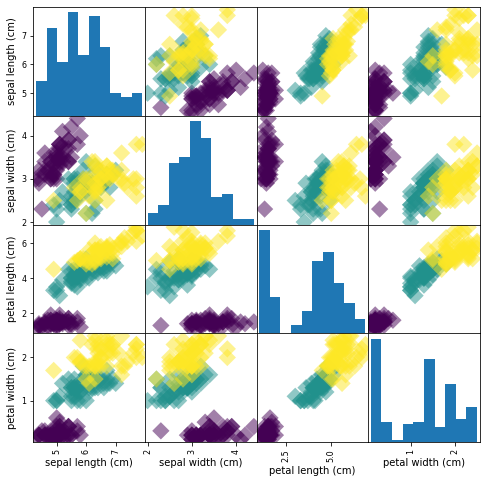

In [6]:
X = ds.data  
y = ds.target
df = pd.DataFrame(X, columns=ds.feature_names) 
print(df.sample())
pd.plotting.scatter_matrix(df, c = y, figsize = [8, 8],s=150, marker = 'D');

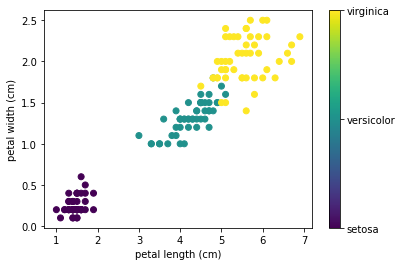

In [16]:
# Si graficamos solo la información de sepalos y miramos como se agrupan asi misma por colores
x_index = 2 
y_index = 3
plt.scatter(ds.data[:, x_index], ds.data[:, y_index], c=ds.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(ds.feature_names[x_index])
plt.ylabel(ds.feature_names[y_index])
plt.show()

## 1. K-Means: Intuición

#### Fit / Predict

In [20]:
from sklearn.cluster import KMeans 
# se crea el modelo 
kmeans  = KMeans(n_clusters=3,init = 'k-means++', random_state = 42) 
# se ajusta el modelo a los datos 
kmeans.fit(X, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
y_kmeans = kmeans.fit_predict(X)

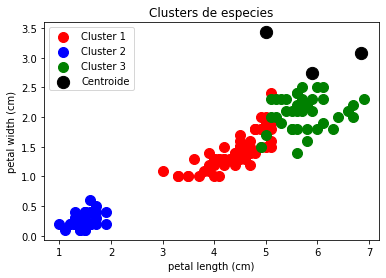

In [43]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, x_index], X[y_kmeans == 0, y_index], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, x_index], X[y_kmeans == 1, y_index], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, x_index], X[y_kmeans == 2, y_index], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroide')
plt.title('Clusters de especies')
plt.xlabel(ds.feature_names[x_index])
plt.ylabel(ds.feature_names[y_index])
plt.legend(loc='best'	)
plt.show()

### Miremos un poco más de K-means


#### Train / Set

In [0]:
len(X) , len(y)

(150, 150)

In [0]:
from sklearn.model_selection import train_test_split  
# se generarán los set de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)


In [0]:
print(X_train.shape)
print(y_train.shape)
print("-"*10)

(105, 4)
(105,)
----------


In [0]:
print(X_test.shape)
print(y_test.shape)
print("-"*10)

(45, 4)
(45,)
----------


In [0]:
# se crea el modelo 
knn = KNeighborsClassifier(n_neighbors=6)  
# se ajusta con train
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [0]:
# se comprueba con test
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1,
       2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2, 1,
       2])

In [0]:
print("Test set predictions: {}".format(y_pred))

Test set predictions: [1 0 0 0 1 1 0 1 0 0 1 1 2 2 0 1 1 1 0 2 2 1 2 1 0 1 0 0 1 2 0 2 1 0 1 1 1
 2 0 2 2 2 2 1 2]


In [0]:
print("Y de pruebas: {}".format(y_test))

Y de pruebas: [1 0 0 0 1 1 0 2 0 0 1 1 2 2 0 1 2 1 0 2 2 1 1 1 0 1 0 0 1 2 0 2 1 0 2 1 1
 2 0 2 2 2 2 1 2]


In [0]:
knn.score(X_test,y_test)

0.9111111111111111

## 2. Regresión 

In [0]:
datos_boston = datasets.load_boston()
df = pd.DataFrame(datos_boston.data, columns=datos_boston.feature_names)
df['target'] = pd.Series(datos_boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 2.1 Definio datos y target

In [0]:
X = df.drop('target', axis=1).values   
y = df['target'].values

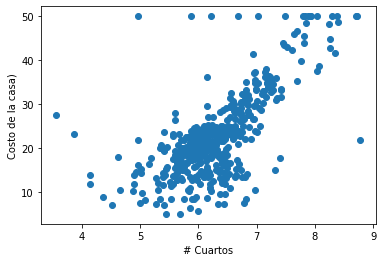

In [0]:
## visualizo los datos
x_cuartos = X[:,5]       
plt.scatter(x_cuartos, y)  
plt.ylabel('Costo de la casa)')  
plt.xlabel('# Cuartos') 
plt.show()

### 2.2 Genero el modelo 

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression
# Defino el modelo 
reg = LinearRegression() 
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Ajusto lova lores
reg.fit(x_cuartos.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

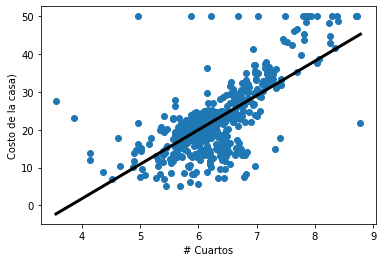

In [0]:
# creo la linea 
prediction_space = np.linspace(min(x_cuartos),max(x_cuartos)).reshape(-1, 1)
plt.scatter(x_cuartos, y)  
plt.plot(prediction_space, reg.predict(prediction_space),color='black', linewidth=3)
plt.ylabel('Costo de la casa)')  
plt.xlabel('# Cuartos') 
plt.show()

In [0]:
# genero mis datos set de datos uno de entrenamiento y otro de pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [0]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg.predict(X_test)

In [0]:
reg.score(X_test,y_test)

0.7149364161392229

### 3. Regresión con multiples variables

En 4 pasos

In [0]:
# Paso 1- la librerias y datos que necesitamos 
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import pandas as pd
# cargo los datos 
datos = datasets.load_wine()
df = pd.DataFrame(datos.data, columns=datos.feature_names)
df['target'] = pd.Series(datos.target)

In [0]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [0]:
# Paso 2 Genero mis datos de entrenamiento y rpuebas 
X = datos.data
y = datos.target
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3, random_state=42)

In [0]:
# Paso 3 - Creo mi modelo de regresión exactament eigual que tuvieramos un solo dato
regresion = LinearRegression()
regresion.fit(X_train, y_train)  
y_pred = regresion.predict(X_test)
print(len(y_test))
y_pred

54


array([ 0.1541804 ,  0.2793251 ,  1.51226242,  0.23069285,  0.91300059,
        0.13035129,  0.94187532,  1.94819584,  0.49694681,  1.41201109,
        0.16037956,  1.98753043,  0.38775636,  1.33885424,  0.12654184,
        1.06364764,  1.22799032,  1.04483338,  0.1246299 ,  0.94276148,
       -0.35865974,  0.55695857,  1.11968789,  2.06220511,  2.22947004,
        2.05349207,  1.01947876,  0.7443841 ,  1.08148491,  0.51558788,
        0.17035709,  1.06708701,  1.61426528,  0.06014809,  0.01381639,
       -0.23122374,  2.25029252,  2.06234639,  0.51860049,  2.2418828 ,
        0.21591904,  1.08686363,  0.74831061,  0.96392521,  1.57690389,
        0.11412164,  0.75475891,  1.14980161,  1.99584692, -0.13672202,
        1.04072383,  0.25515547, -0.06793451,  2.0741287 ])

In [0]:
# Paso 4 - Compruebo los resultados
regresion.score(X_test, y_test)

0.9007762333580169

### 4. Validación cruzada

In [0]:
# Paso 1 - Importamos librerias
from sklearn.model_selection import cross_val_score  
from sklearn.linear_model import LinearRegression


In [0]:
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)  
print(cv_results)


In [0]:
np.mean(cv_results)


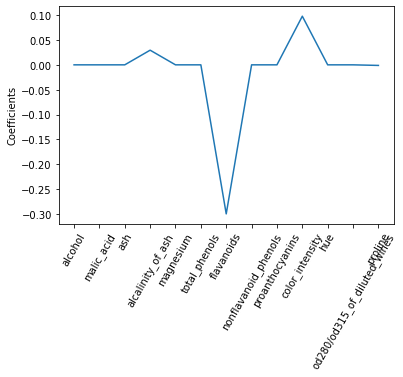

In [0]:
from sklearn.linear_model import Lasso
names = df.drop('target', axis=1).columns  
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')  
plt.show()


### 5. Matriz de confusión

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier 
iris = datasets.load_iris()  


In [0]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=42)   


In [0]:
knn = KNeighborsClassifier(n_neighbors=6) 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)

In [0]:
print(confusion_matrix(y_test, y_pred))

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



### 6. Identificar los mejores parametros

In [0]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'n_neighbors': np.arange(1, 50)} 
knn = KNeighborsClassifier()  
knn_cv = GridSearchCV(knn, param_grid, cv=5) 
knn_cv.fit(X, y) 
knn_cv.best_params_

{'n_neighbors': 1}

In [0]:
knn_cv.best_score_

0.7250793650793651

### 7. Normalización de los datos


In [0]:
from sklearn.preprocessing import scale
X  = iris.data

In [0]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [0]:
X_scaled = scale(X) 

In [0]:
X_scaled

array([[-0.9,  1. , -1.3, -1.3],
       [-1.1, -0.1, -1.3, -1.3],
       [-1.4,  0.3, -1.4, -1.3],
       [-1.5,  0.1, -1.3, -1.3],
       [-1. ,  1.2, -1.3, -1.3],
       [-0.5,  1.9, -1.2, -1.1],
       [-1.5,  0.8, -1.3, -1.2],
       [-1. ,  0.8, -1.3, -1.3],
       [-1.7, -0.4, -1.3, -1.3],
       [-1.1,  0.1, -1.3, -1.4],
       [-0.5,  1.5, -1.3, -1.3],
       [-1.3,  0.8, -1.2, -1.3],
       [-1.3, -0.1, -1.3, -1.4],
       [-1.9, -0.1, -1.5, -1.4],
       [-0.1,  2.2, -1.5, -1.3],
       [-0.2,  3.1, -1.3, -1.1],
       [-0.5,  1.9, -1.4, -1.1],
       [-0.9,  1. , -1.3, -1.2],
       [-0.2,  1.7, -1.2, -1.2],
       [-0.9,  1.7, -1.3, -1.2],
       [-0.5,  0.8, -1.2, -1.3],
       [-0.9,  1.5, -1.3, -1.1],
       [-1.5,  1.2, -1.6, -1.3],
       [-0.9,  0.6, -1.2, -0.9],
       [-1.3,  0.8, -1.1, -1.3],
       [-1. , -0.1, -1.2, -1.3],
       [-1. ,  0.8, -1.2, -1.1],
       [-0.8,  1. , -1.3, -1.3],
       [-0.8,  0.8, -1.3, -1.3],
       [-1.4,  0.3, -1.2, -1.3],
       [-1

In [0]:
np.mean(X), np.std(X) 

(3.4644999999999997, 1.9738430577598278)

In [0]:
np.mean(X_scaled), np.std(X_scaled)

(-1.4684549872375404e-15, 1.0)

### 8. Información categorica

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
## ML
from sklearn.linear_model import LinearRegression
np.set_printoptions(precision=1,suppress=True)

In [0]:

url = 'https://github.com/julian-masdatascience/ML/raw/master/A_Z/DS/fondo_inversion.csv'
dataset = pd.read_csv(url)
dataset.head()


,R&D,Administrativo,Marketing,Estado,Ganancia
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [0]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [0]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [0]:
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1],
       [131876.9, 99814.71, 362861.36, 2],
       [134615.46, 147198.87, 127716.82, 0],
       [130298.13, 145530.06, 323876.68, 1],
       [120542.52, 148718.95, 311613.29, 2],
       [123334.88, 108679.17, 304981.62, 0],
       [101913.08, 110594.11, 229160.95, 1],
       [100671.96, 91790.61, 249744.55, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [91992.39, 135495.07, 252664.93, 0],
       [119943.24, 156547.42, 256512.92, 1],
       [114523.61, 122616.84, 261776.23, 2],
       [78013.11, 121597.55, 264346.06, 0],
       [94657.16, 145077.58, 282574.31, 2],
       [91749.16, 114175.79, 294919.57, 1],
       [86419.7, 153514.11, 0.0, 2],
       [76253.86, 113867.3, 298664.47, 0],
       [78389.47, 153773.43, 299737.29, 2],
       [73994.56, 122782.75, 30331

In [0]:
ct =ColumnTransformer([('encoder', OneHotEncoder(), [3])],remainder='passthrough')
X= np.array(ct.fit_transform(X), dtype=np.float)

In [0]:
X

array([[     0. ,      0. ,      1. , 165349.2, 136897.8, 471784.1],
       [     1. ,      0. ,      0. , 162597.7, 151377.6, 443898.5],
       [     0. ,      1. ,      0. , 153441.5, 101145.6, 407934.5],
       [     0. ,      0. ,      1. , 144372.4, 118671.9, 383199.6],
       [     0. ,      1. ,      0. , 142107.3,  91391.8, 366168.4],
       [     0. ,      0. ,      1. , 131876.9,  99814.7, 362861.4],
       [     1. ,      0. ,      0. , 134615.5, 147198.9, 127716.8],
       [     0. ,      1. ,      0. , 130298.1, 145530.1, 323876.7],
       [     0. ,      0. ,      1. , 120542.5, 148719. , 311613.3],
       [     1. ,      0. ,      0. , 123334.9, 108679.2, 304981.6],
       [     0. ,      1. ,      0. , 101913.1, 110594.1, 229161. ],
       [     1. ,      0. ,      0. , 100672. ,  91790.6, 249744.5],
       [     0. ,      1. ,      0. ,  93863.8, 127320.4, 249839.4],
       [     1. ,      0. ,      0. ,  91992.4, 135495.1, 252664.9],
       [     0. ,      1. ,      0

### 9. Información faltante

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

In [0]:
# Importing the dataset
dataset = pd.read_csv('https://github.com/julian-masdatascience/ML/raw/master/A_Z/DS/Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [0]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [0]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(X[:,1:3])


In [0]:
X[:,1:3]=imputer.transform(X[:,1:3])

In [0]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)